import statement

In [4]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt  # Often used alongside Seaborn for additional plotting capabilities
import plotly.express as px

Notebook format

In [5]:
pd.options.display.float_format = '{:,.2f}'.format

Read the data

In [6]:
df = pd.read_csv("Space_Corrected.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Cleaning the data

In [7]:
df = df.drop("Unnamed: 0.1",axis = 1)

df = df.drop("Unnamed: 0",axis = 1)
df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


Check for duplicates

In [8]:
df.duplicated().any()
df.drop_duplicates(inplace = True)


In [9]:
df.isna().sum()

,0
Company Name,0
Location,0
Datum,0
Detail,0
Status Rocket,0
Rocket,3360
Status Mission,0


In [10]:
df.tail()


,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [11]:
df["year"] = df.Datum.str.split(" ").str[3]
df["year"] = pd.to_numeric(df["year"])

Which year has the highest space mission along with their status

In [12]:
data = df.groupby(['year','Status Mission']).size().reset_index(name = "count")
data.head()

,year,Status Mission,count
0,1957,Failure,1
1,1957,Success,2
2,1958,Failure,20
3,1958,Partial Failure,2
4,1958,Success,6


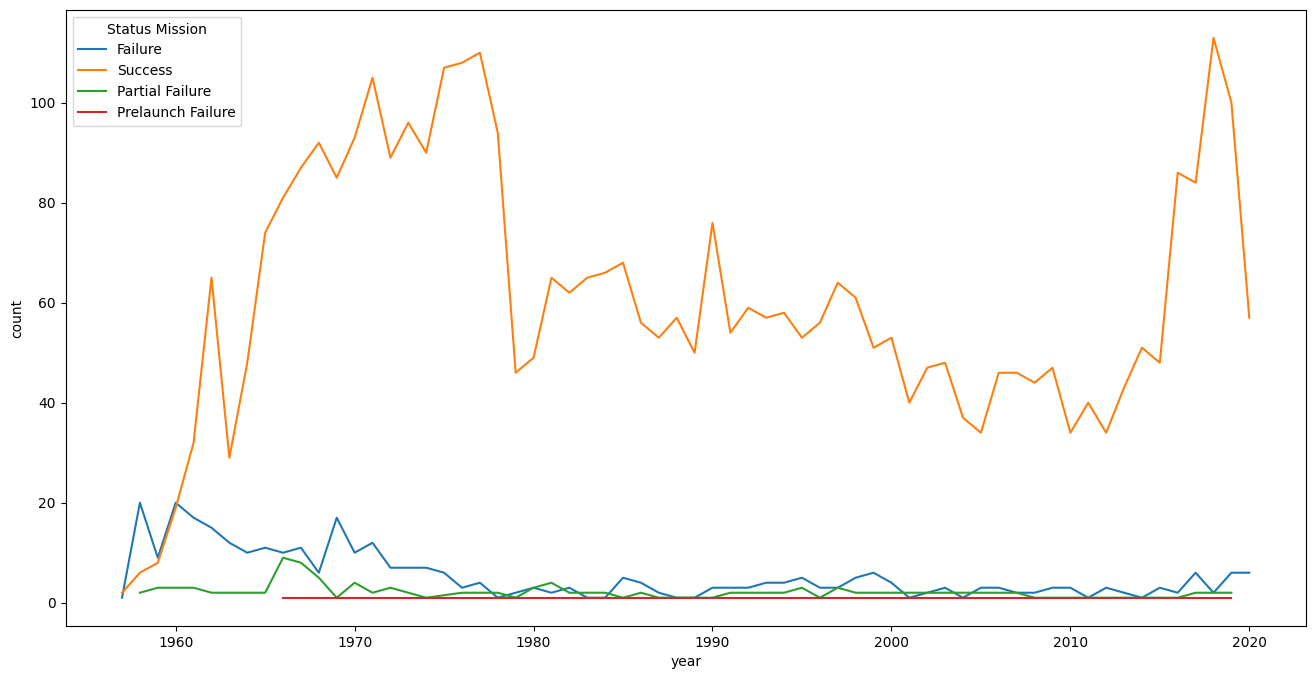

In [13]:
plt.figure(figsize = (16,8))
sns.lineplot(data = data,x ="year",y = "count",hue = "Status Mission")
plt.show()

which location has the highset rocket

In [14]:
df.Location.value_counts()

,count
Location,
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",235
"Site 132/1, Plesetsk Cosmodrome, Russia",216
"Site 43/4, Plesetsk Cosmodrome, Russia",202
"Site 41/1, Plesetsk Cosmodrome, Russia",198
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",193
...,...
"Jiuquan Satellite Launch Center, China",1
"LP-41, Kauai, Pacific Missile Range Facility",1
"Tai Rui Barge, Yellow Sea",1


Evolution of success rateover the year

In [15]:
dataframe1 = df.groupby(['year','Status Mission']).size().reset_index(name = "count")
df1 = dataframe1[dataframe1["Status Mission"]== "Success"]
df2 = dataframe1[dataframe1["Status Mission"]=="Failure"]
df1 = df1.rename(columns = {"count":"s_count"})
df1.head()
df2 = df2.rename(columns = {"count":"f_count"})
df2.head()

,year,Status Mission,f_count
0,1957,Failure,1
2,1958,Failure,20
5,1959,Failure,9
8,1960,Failure,20
10,1961,Failure,17


In [16]:
merged_df = pd.merge(df1, df2, on='year')
merged_df.head()

,year,Status Mission_x,s_count,Status Mission_y,f_count
0,1957,Success,2,Failure,1
1,1958,Success,6,Failure,20
2,1959,Success,8,Failure,9
3,1960,Success,19,Failure,20
4,1961,Success,32,Failure,17


In [17]:
merged_df["success rate"] = merged_df["s_count"]/(merged_df["s_count"] + merged_df["f_count"])

merged_df["success rate"] = merged_df["success rate"]*100
merged_df.head()


,year,Status Mission_x,s_count,Status Mission_y,f_count,success rate
0,1957,Success,2,Failure,1,66.67
1,1958,Success,6,Failure,20,23.08
2,1959,Success,8,Failure,9,47.06
3,1960,Success,19,Failure,20,48.72
4,1961,Success,32,Failure,17,65.31


graph for visualising Evolution of success rateover the year

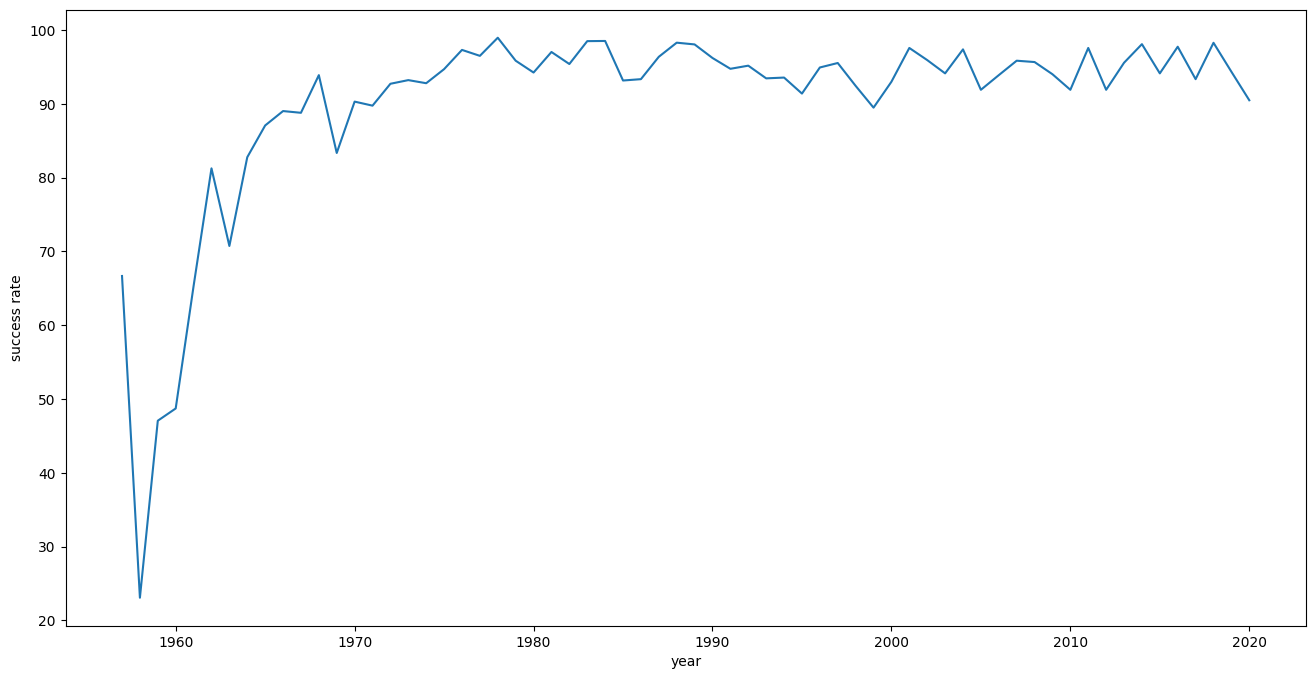

In [18]:
plt.figure(figsize = (16,8))
sns.lineplot(data = merged_df,x = "year",y = "success rate")
plt.show()

success rate over decade

In [19]:
merged_df['Decade'] = (merged_df['year'] // 10) * 10
decade_success_rate = merged_df.groupby('Decade')['success rate'].mean()
decade_success_rate = decade_success_rate.reset_index()


In [20]:
bar = px.bar(decade_success_rate, x = "Decade",y = "success rate",color = decade_success_rate["success rate"],color_continuous_scale = px.colors.sequential.matter)
bar.show()

Which company has the highest success rate in launching a rocket

In [21]:
dataframe = df.groupby(['Company Name','Status Mission']).size().reset_index(name = "count")
df1 = dataframe[dataframe["Status Mission"]== "Success"]
df2 = dataframe[dataframe["Status Mission"]=="Failure"]
df1 = df1.rename(columns = {"count":"s_count"})
df1.head()
df2 = df2.rename(columns = {"count":"f_count"})
df2.head()


,Company Name,Status Mission,f_count
0,AEB,Failure,2
2,AMBA,Failure,3
6,Arianespace,Failure,7
12,Boeing,Failure,3
15,CASC,Failure,14


In [22]:
merged_df = pd.merge(df1, df2, on='Company Name')
merged_df.head()


,Company Name,Status Mission_x,s_count,Status Mission_y,f_count
0,AMBA,Success,4,Failure,3
1,Arianespace,Success,269,Failure,7
2,Boeing,Success,131,Failure,3
3,CASC,Success,230,Failure,14
4,CASIC,Success,3,Failure,2


In [23]:
merged_df["success rate"] = merged_df["s_count"]/(merged_df["s_count"] + merged_df["f_count"])
merged_df["success rate"] = merged_df["success rate"]*100
merged_df = merged_df.sort_values(by = "success rate",ascending = False).head(15)
merged_df = merged_df[::-1]
merged_df.head()

,Company Name,Status Mission_x,s_count,Status Mission_y,f_count,success rate
22,Martin Marietta,Success,100,Failure,11,90.09
24,Northrop,Success,74,Failure,7,91.36
30,Sea Launch,Success,33,Failure,3,91.67
8,Eurockot,Success,12,Failure,1,92.31
26,RVSN USSR,Success,1614,Failure,121,93.03


Horizontal Bar chart for top 15 countries having highest success rate

In [24]:
# plt.figure(figsize =(16,8))
# sns.barplot(data = merged_df,x ="success rate",y ="Company Name",orient = "h")
# plt.show()
bar = px.bar(merged_df, x = "success rate",y = "Company Name",orientation = "h",color = merged_df["success rate"],color_continuous_scale = px.colors.sequential.matter)
bar.show()

Pie chart of total failure and success mission

In [25]:
df_count = df["Status Mission"].value_counts().reset_index(name = "count")
fig = px.pie(df_count,values = "count",names = "Status Mission")
fig.show()

Growth in space exploration activities globally.

In [26]:
df3 = df.year.value_counts().reset_index(name = "count")
df3.head()

,year,count
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113


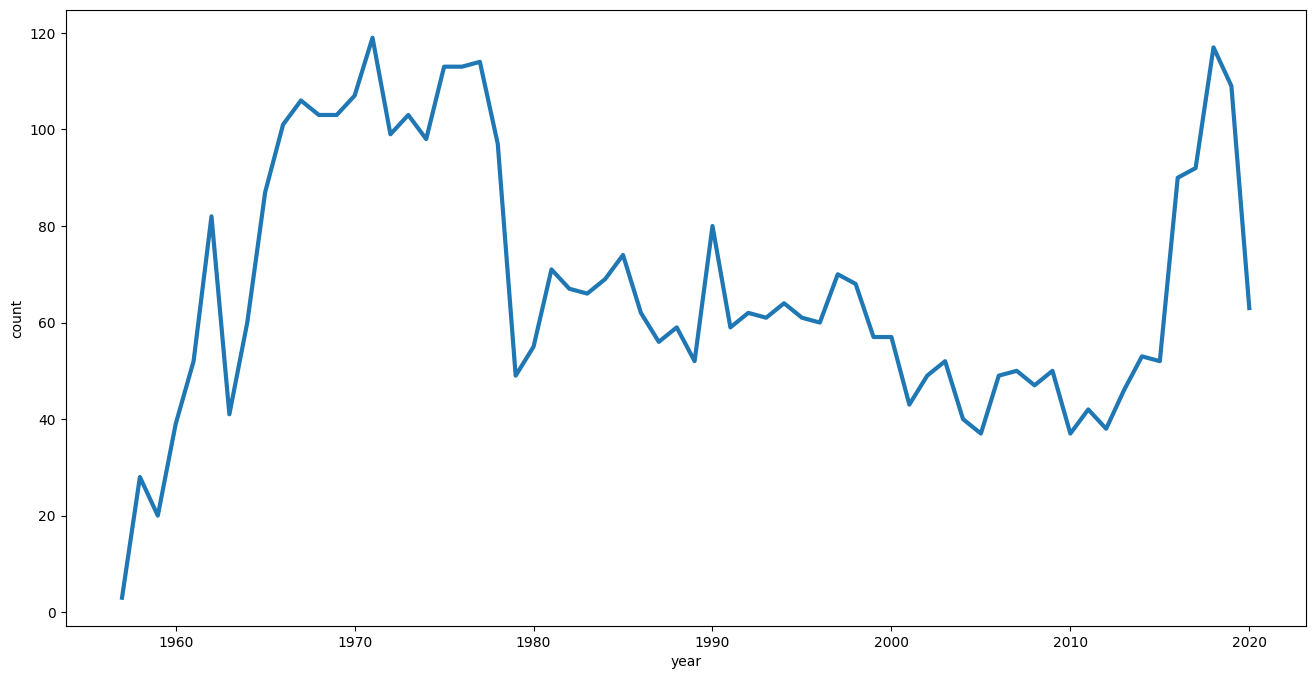

In [27]:
plt.figure(figsize = (16,8))
sns.lineplot(data = df3,x = "year",y = "count",linewidth= 3)
plt.show()

Most used rockets

In [28]:
dataframe2 = df.Detail.value_counts().reset_index(name = "count").head(15)[::-1]


In [29]:
bar = px.bar(dataframe2, x = "count",y = "Detail",orientation = "h",color = dataframe2["count"],color_continuous_scale = px.colors.sequential.matter)
bar.show()